<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/VAR_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load data**
## **You may need to upload pollution.csv to /content/pollution.csv**

## **Import libs**

In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (15, 8)  # modify here to change the size of figures
mpl.rcParams['axes.grid'] = False

## **Load dataset**

In [27]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## **Visualize data**

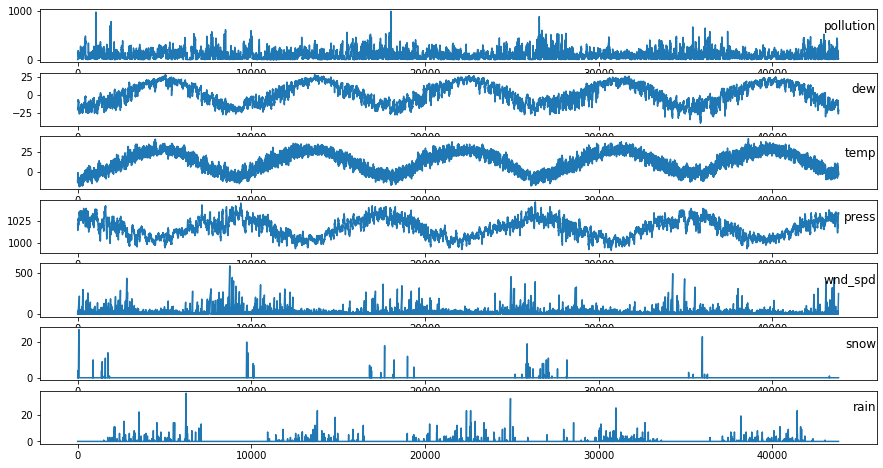

In [28]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

# **Step 2: Data Property Analysis**

## **Encode wind direction**

In [29]:
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Check stationary or not**

In [30]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

pollution - Series is Stationary
dew - Series is Stationary
temp - Series is Stationary
press - Series is Stationary
wnd_dir - Series is Stationary
wnd_spd - Series is Stationary
snow - Series is Stationary
rain - Series is Stationary


## **Choose lag = 8 and show P_values**

In [31]:
max_lags=8  # modify here to choose the lag
y='pollution'

In [32]:
for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - dew : P_Values - [0.0006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - temp : P_Values - [0.0047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - press : P_Values - [0.7517, 0.0933, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - wnd_dir : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - wnd_spd : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - snow : P_Values - [0.135, 0.3248, 0.2946, 0.4104, 0.419, 0.5307, 0.616, 0.6595]
Column - rain : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## **Choose the input data**

In [33]:
df_input=df[['pollution','dew','temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']]  # modify here to choose the variate
df_input

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1.0,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1.0,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1.0,242.70,0,0


# **Step 3: Prepare for model**

## **Split training and testing data**

In [34]:
df_train = df_input[:int(0.9*(len(df_input)))]
print('train shape: ', str(df_train.shape))
df_test = df_input[int(0.9*(len(df_input))):]
print('test shape: ', str(df_test.shape))

train shape:  (39441, 8)
test shape:  (4383, 8)


# **Step 4: Train VAR Model**

## **Fit to model and find the best lag number**

In [35]:
model = VAR(df_train, freq="1H")
order = 48 # modify here to choose the order
# for i in range(order):
#     results = model.fit(i+1)
#     print('Order = ', i+1)
#     print('AIC: ', results.aic)
#     print('BIC: ', results.bic)

In [36]:
model.select_order(order).summary()

,AIC,BIC,FPE,HQIC
0,29.17,29.17,4.654e+12,29.17
1,9.186,9.201,9758.,9.191
2,8.902,8.931,7344.,8.911
3,8.723,8.766,6142.,8.737
4,8.668,8.725,5811.,8.686
5,8.648,8.719,5697.,8.670
6,8.625,8.711,5570.,8.652
7,8.614,8.713,5509.,8.646
8,8.606,8.719,5463.,8.642
9,8.591,8.719,5386.,8.632


## **Choose lag = 25 and fit model again**

In [37]:
model = VAR(df_train, freq="1H")
results = model.fit(25)

In [38]:
# print(results.summary())  # show the weight of each variate in lag 25

In [39]:
lag=results.k_ar
print(lag)

25


# **Step 5: Implement Data Forecasting**

## **Do a small test**

In [40]:
pred = np.zeros(0)
for i in range(25, 30):
  pred_next = results.forecast(df_test.values[i-25:i],steps=1)[:, 0]
  pred = np.append(pred, pred_next)
pred

array([266.31334138, 262.75512011, 261.36104564, 244.86235098,
       221.32903262])

In [41]:
df_test[25:30]

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2014-07-03 10:00:00,277.0,22,26.0,1002.0,2.0,8.95,0,0
2014-07-03 11:00:00,274.0,22,27.0,1001.0,2.0,10.74,0,0
2014-07-03 12:00:00,256.0,22,28.0,1001.0,3.0,1.79,0,0
2014-07-03 13:00:00,232.0,22,28.0,1001.0,2.0,1.79,0,0
2014-07-03 14:00:00,212.0,22,28.0,1000.0,2.0,3.58,0,0


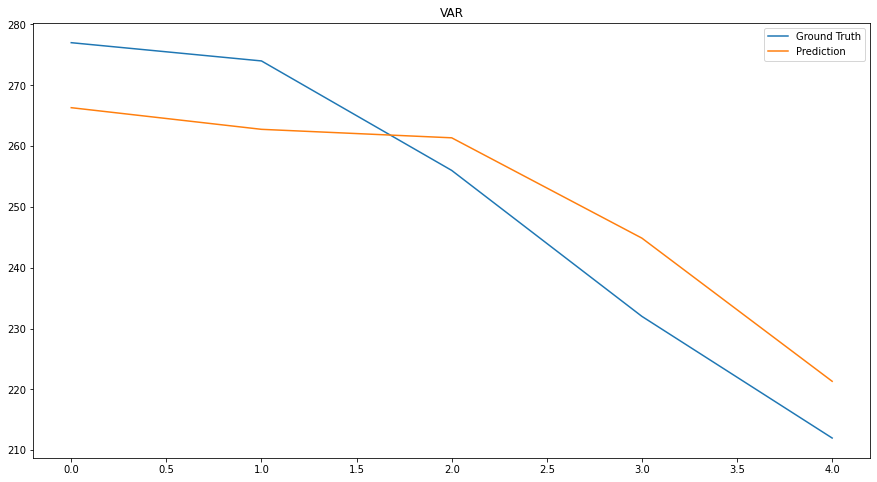

In [42]:
plt.plot(df_test['pollution'].values[25:30], label='Ground Truth')
plt.plot(pred, label='Prediction')
plt.title("VAR")
plt.legend()
plt.show()

## **Show the coefficient and their P_Values**

In [43]:
df_coeff=pd.DataFrame([results.params['pollution'],results.pvalues['pollution']]).T
df_coeff

,pollution,pollution
const,16.573188,5.795308e-01
L1.pollution,0.914999,0.000000e+00
L1.dew,1.915898,5.375148e-72
L1.temp,-0.560451,2.842050e-06
L1.press,-1.477611,6.678004e-10
...,...,...
L25.press,-0.382733,1.079026e-01
L25.wnd_dir,-0.252301,1.385707e-01
L25.wnd_spd,0.008001,3.635420e-01
L25.snow,-0.462289,2.541066e-01


## **Time series forecasting by VAR**

In [44]:
pred = np.zeros(25)
print("test shape: ", str(df_test.shape))
for i in range(25, int(len(df_test['pollution']))):
  pred_next = results.forecast(df_test.values[i-25:i],steps=1)[:, 0]
  pred = np.append(pred, pred_next)
print("prediction shape: ", str(pred.shape))

test shape:  (4383, 8)
prediction shape:  (4383,)


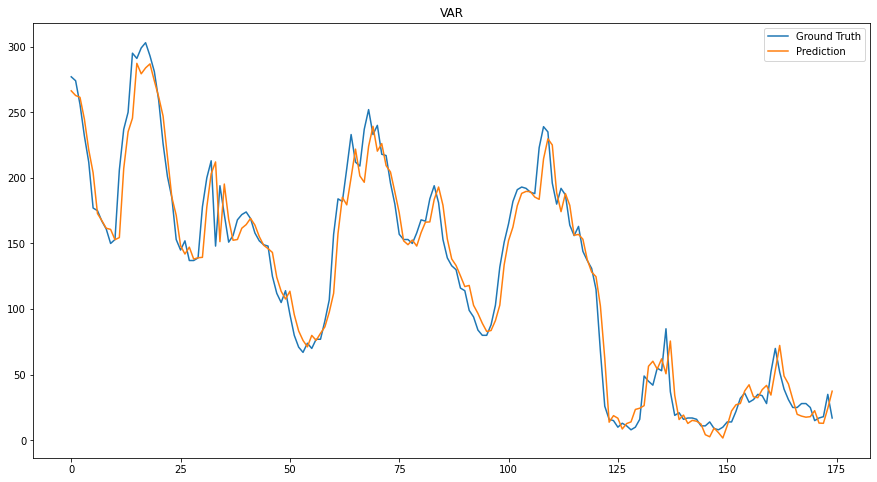

In [45]:
plt.plot(df_test['pollution'].values[25:200], label='Ground Truth')
plt.plot(pred[25:200], label='Prediction')
plt.title("VAR")
plt.legend()
plt.show()

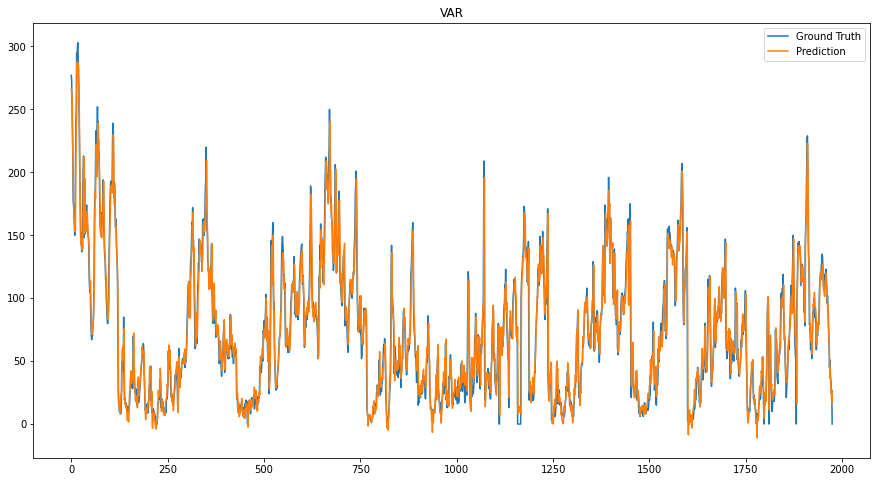

In [46]:
plt.plot(df_test['pollution'].values[25:2000], label='Ground Truth')
plt.plot(pred[25:2000], label='Prediction')
plt.title("VAR")
plt.legend()
plt.show()